In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Create your df here:
df = pd.read_csv('profiles.csv')

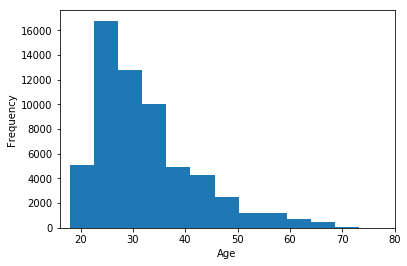

m    35829
f    24117
Name: sex, dtype: int64


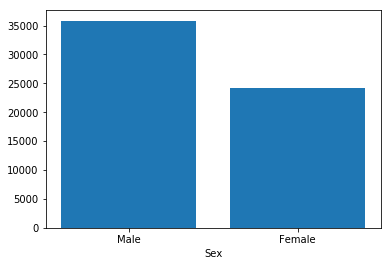

(-1.112821928260545,
 1.100610568012407,
 -1.1189229146555009,
 1.1137414242477366)

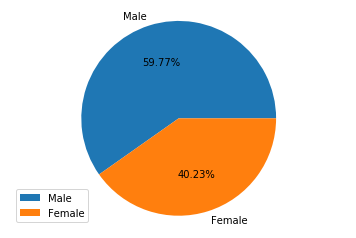

In [15]:
#exploring data
#print(df.drinks.value_counts())

#print(df[['essay1','sex']].iloc[1])

plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

plt.cla()

print(df.sex.value_counts())
plt.bar([0,1],df.sex.value_counts().values)

plt.xlabel('Sex')
plt.xticks([0,1],labels = ['Male','Female'])
plt.show()

plt.cla()

plt.pie(df.sex.value_counts().values,labels = ['Male','Female'],autopct = '%.2f%%')
plt.legend()
plt.axis('Equal')


In [43]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
drug_mapping = {'never' : 0,'sometimes' : 1,'often': 2}
smoke_mapping = {'no':0,'trying to quit':1,'when drinking':2,'sometimes':3,'yes':4}

df['drinks_code'] = df.drinks.map(drink_mapping)
df['drugs_code'] =df.drinks.map(drug_mapping)
df['smokes_code'] =df.smokes.map(smoke_mapping)

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x))

df.sign.dropna(inplace=True)
get_sign = lambda x: x.split(' ')[0]
df.sign = df.sign.apply(get_sign)


In [45]:
from sklearn import preprocessing
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len']]

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

# Classification Problems

In [ ]:
#first question: can we predict sex with education level and income?
# let's use a SVM
num_guys = df[df.sex == 'm'].sex.count()
num_girls = df[df.sex == 'f'].sex.count()

df = df[df.income !=-1]
labels = df.sex.map({'m':0,'f':1})
income = df.income


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
classifier = SVC(kernel = 'linear',C = 0.5)

X_train, X_test, y_train, y_test = tts(income,labels)

classifier.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
predictions = classifier.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
